In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

#실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer,load_boston

#데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import KFold

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus']=False
#한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

In [2]:
# 데이터셋 로드 및 설명
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
breast_cancer.data.shape

(569, 30)

In [4]:
# 탐색적 데이터 분석 및 데이터 전처리

In [5]:
# 데이터 프레임 형태로 변환
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagosis'])

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.tail()

,diagosis
564,0
565,0
566,0
567,0
568,1


In [8]:
# 결측치,

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
X.describe() # X 변수들의 통계값

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
y['diagosis'].value_counts()

1    357
0    212
Name: diagosis, dtype: int64

In [12]:
# Train/Test 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=2021)

#데이터 컬럼 단위 정규화하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

print(f'Train set dimens is {X_train.shape}')
print(f'Test set dimens is {X_test.shape}')

Train set dimens is (398, 30)
Test set dimens is (171, 30)


In [13]:
# 4.모델링
# 하이퍼파라미터 결정
# 4.1 단순 모델링(사용자가 하이퍼 파라미터 정의)

In [14]:
rfc = RandomForestClassifier(n_estimators=10,random_state=2021)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2021)

In [15]:
# Train set 에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true=y_train, y_pred=y_pred)
print("Train set 에 대한 성능")
print(f"정확도 : {acc:0.4f}")

# Test set 에 대한 선능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print("\n")
print("Test set 에 대한 성능")
print(f"정확도 : {acc:0.4f}")

Train set 에 대한 성능
정확도 : 1.0000


Test set 에 대한 성능
정확도 : 0.9708


In [16]:
# 4.2 단일 하이퍼 파라미터에 대한 Grid search

100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


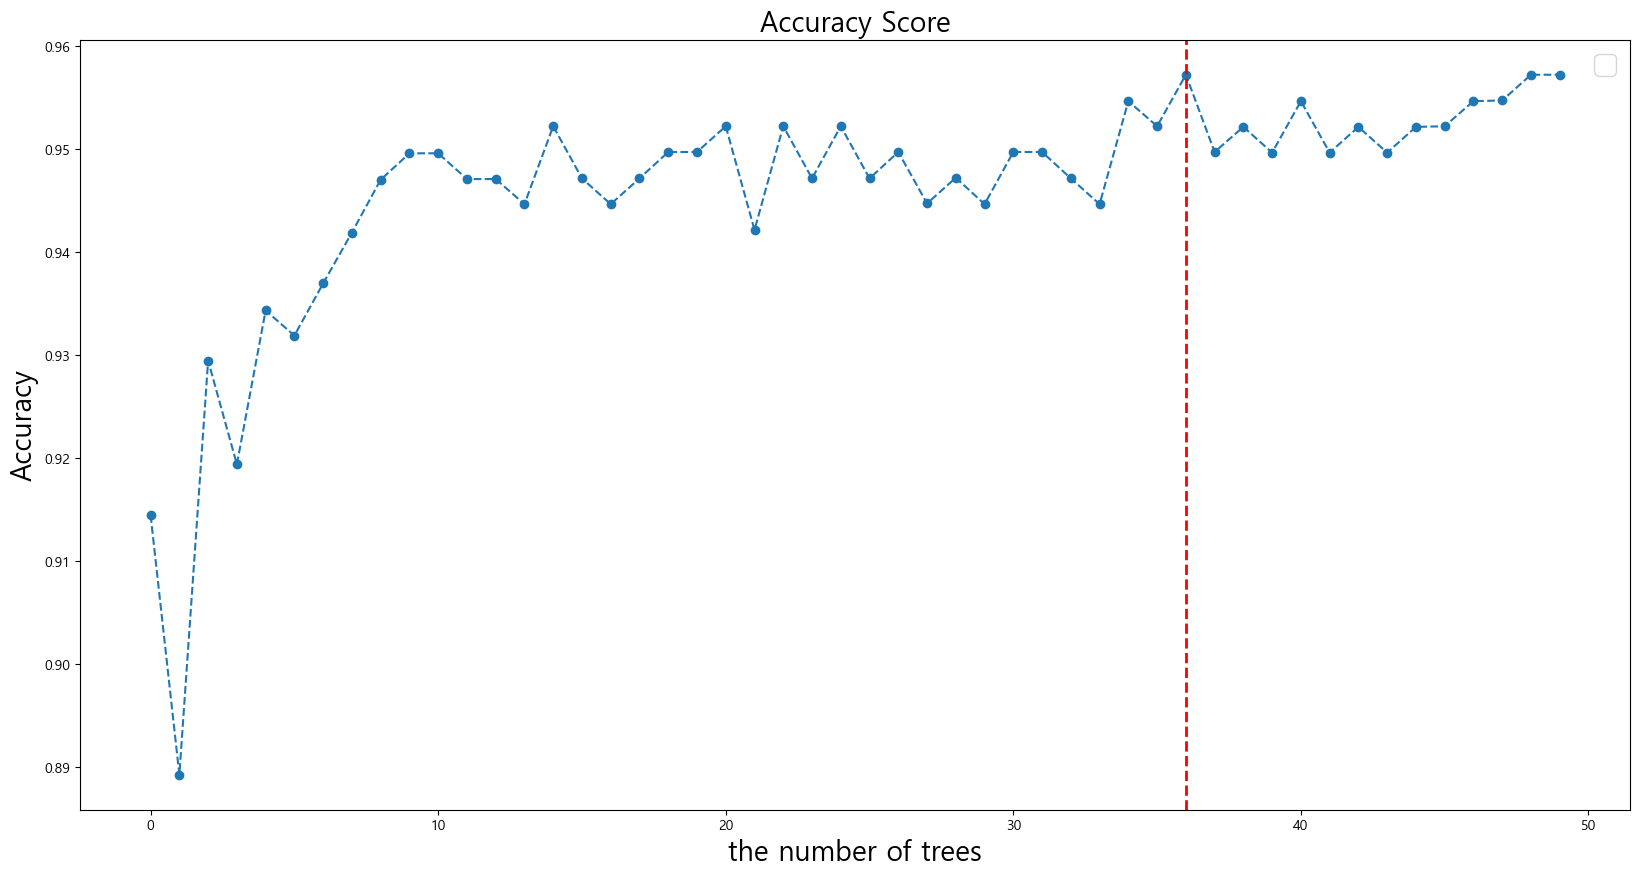

In [17]:
cv_scores = []
estimator_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores))
          if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation on scores"], fontsize = 20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('the number of trees', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title("Accuracy Score", fontsize=20)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2) # 선을 그어줌(아래 빨간색)
plt.show()

In [18]:
print(f"최적의 tree 개수 : {(cv_scores.index(max(cv_scores)))+1}")
print("\n")
print("Train set에 대한 성능(10 fold cross validation)")
print(f"정확도 : {max(cv_scores) : 0.4f}")

최적의 tree 개수 : 37


Train set에 대한 성능(10 fold cross validation)
정확도 :  0.9572


In [19]:
# 위에서 37개가 최적이므로 37개로 다시 모델링한다.
rfc = RandomForestClassifier(n_estimators=37, n_jobs=-1, random_state=2021)
rfc.fit(X_train,y_train)

# Train set 에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true=y_train, y_pred=y_pred)
print("Train set 에 대한 성능")
print(f"정확도 : {acc:0.4f}")

# Test set 에 대한 선능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print("\n")
print("Test set 에 대한 성능")
print(f"정확도 : {acc:0.4f}")

Train set 에 대한 성능
정확도 : 1.0000


Test set 에 대한 성능
정확도 : 0.9766


In [20]:
# 4.3 전체 하이퍼 파라미터에 대한 Grid Search(파라미터 최적화)
rfc = RandomForestClassifier(random_state=2021)
param_grid={
    'n_estimators' : [50,60,70],
    'max_depth' : [10,15,20],
    'max_leaf_nodes' : [50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto','sqrt','log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)
CV_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 150],
                         'n_estimators': [50, 60, 70]},
             verbose=1)

In [21]:
#최적의 하이퍼 파라미터 셋
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'n_estimators': 50}

In [22]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params', 'mean_test_score']])

                                                params  mean_test_score
81   {'criterion': 'entropy', 'max_depth': 10, 'max...         0.959808
147  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.959808
111  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.959808
117  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.959808
108  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.959808
..                                                 ...              ...
42   {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.947115
39   {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.947115
36   {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.947115
33   {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.947115
0    {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.947115

[162 rows x 2 columns]


In [23]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       n_estimators=50, random_state=2021)

In [24]:
# Train set 에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true=y_train, y_pred=y_pred)
print("Train set 에 대한 성능")
print(f"정확도 : {acc:0.4f}")

# Test set 에 대한 선능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print("\n")
print("Test set 에 대한 성능")
print(f"정확도 : {acc:0.4f}")

Train set 에 대한 성능
정확도 : 1.0000


Test set 에 대한 성능
정확도 : 0.9825


In [25]:
recall = recall_score(y_true=y_test, y_pred=y_pred) 
precision = precision_score(y_true=y_test, y_pred=y_pred)

print(f"정확도 : {acc:0.4f}  |",f"  민감도 : {recall:0.4f}  |",f"  정밀도 : {precision:0.4f}  ",sep='')

정확도 : 0.9825  |  민감도 : 0.9907  |  정밀도 : 0.9815  


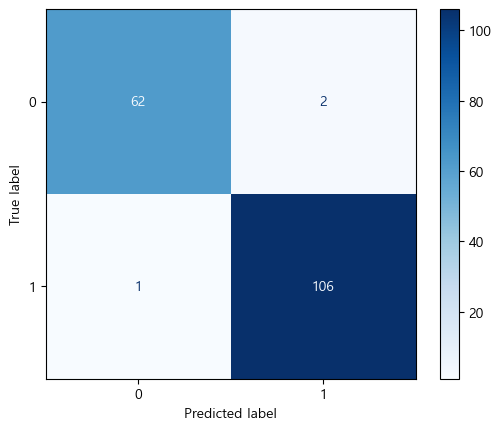

In [26]:
plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

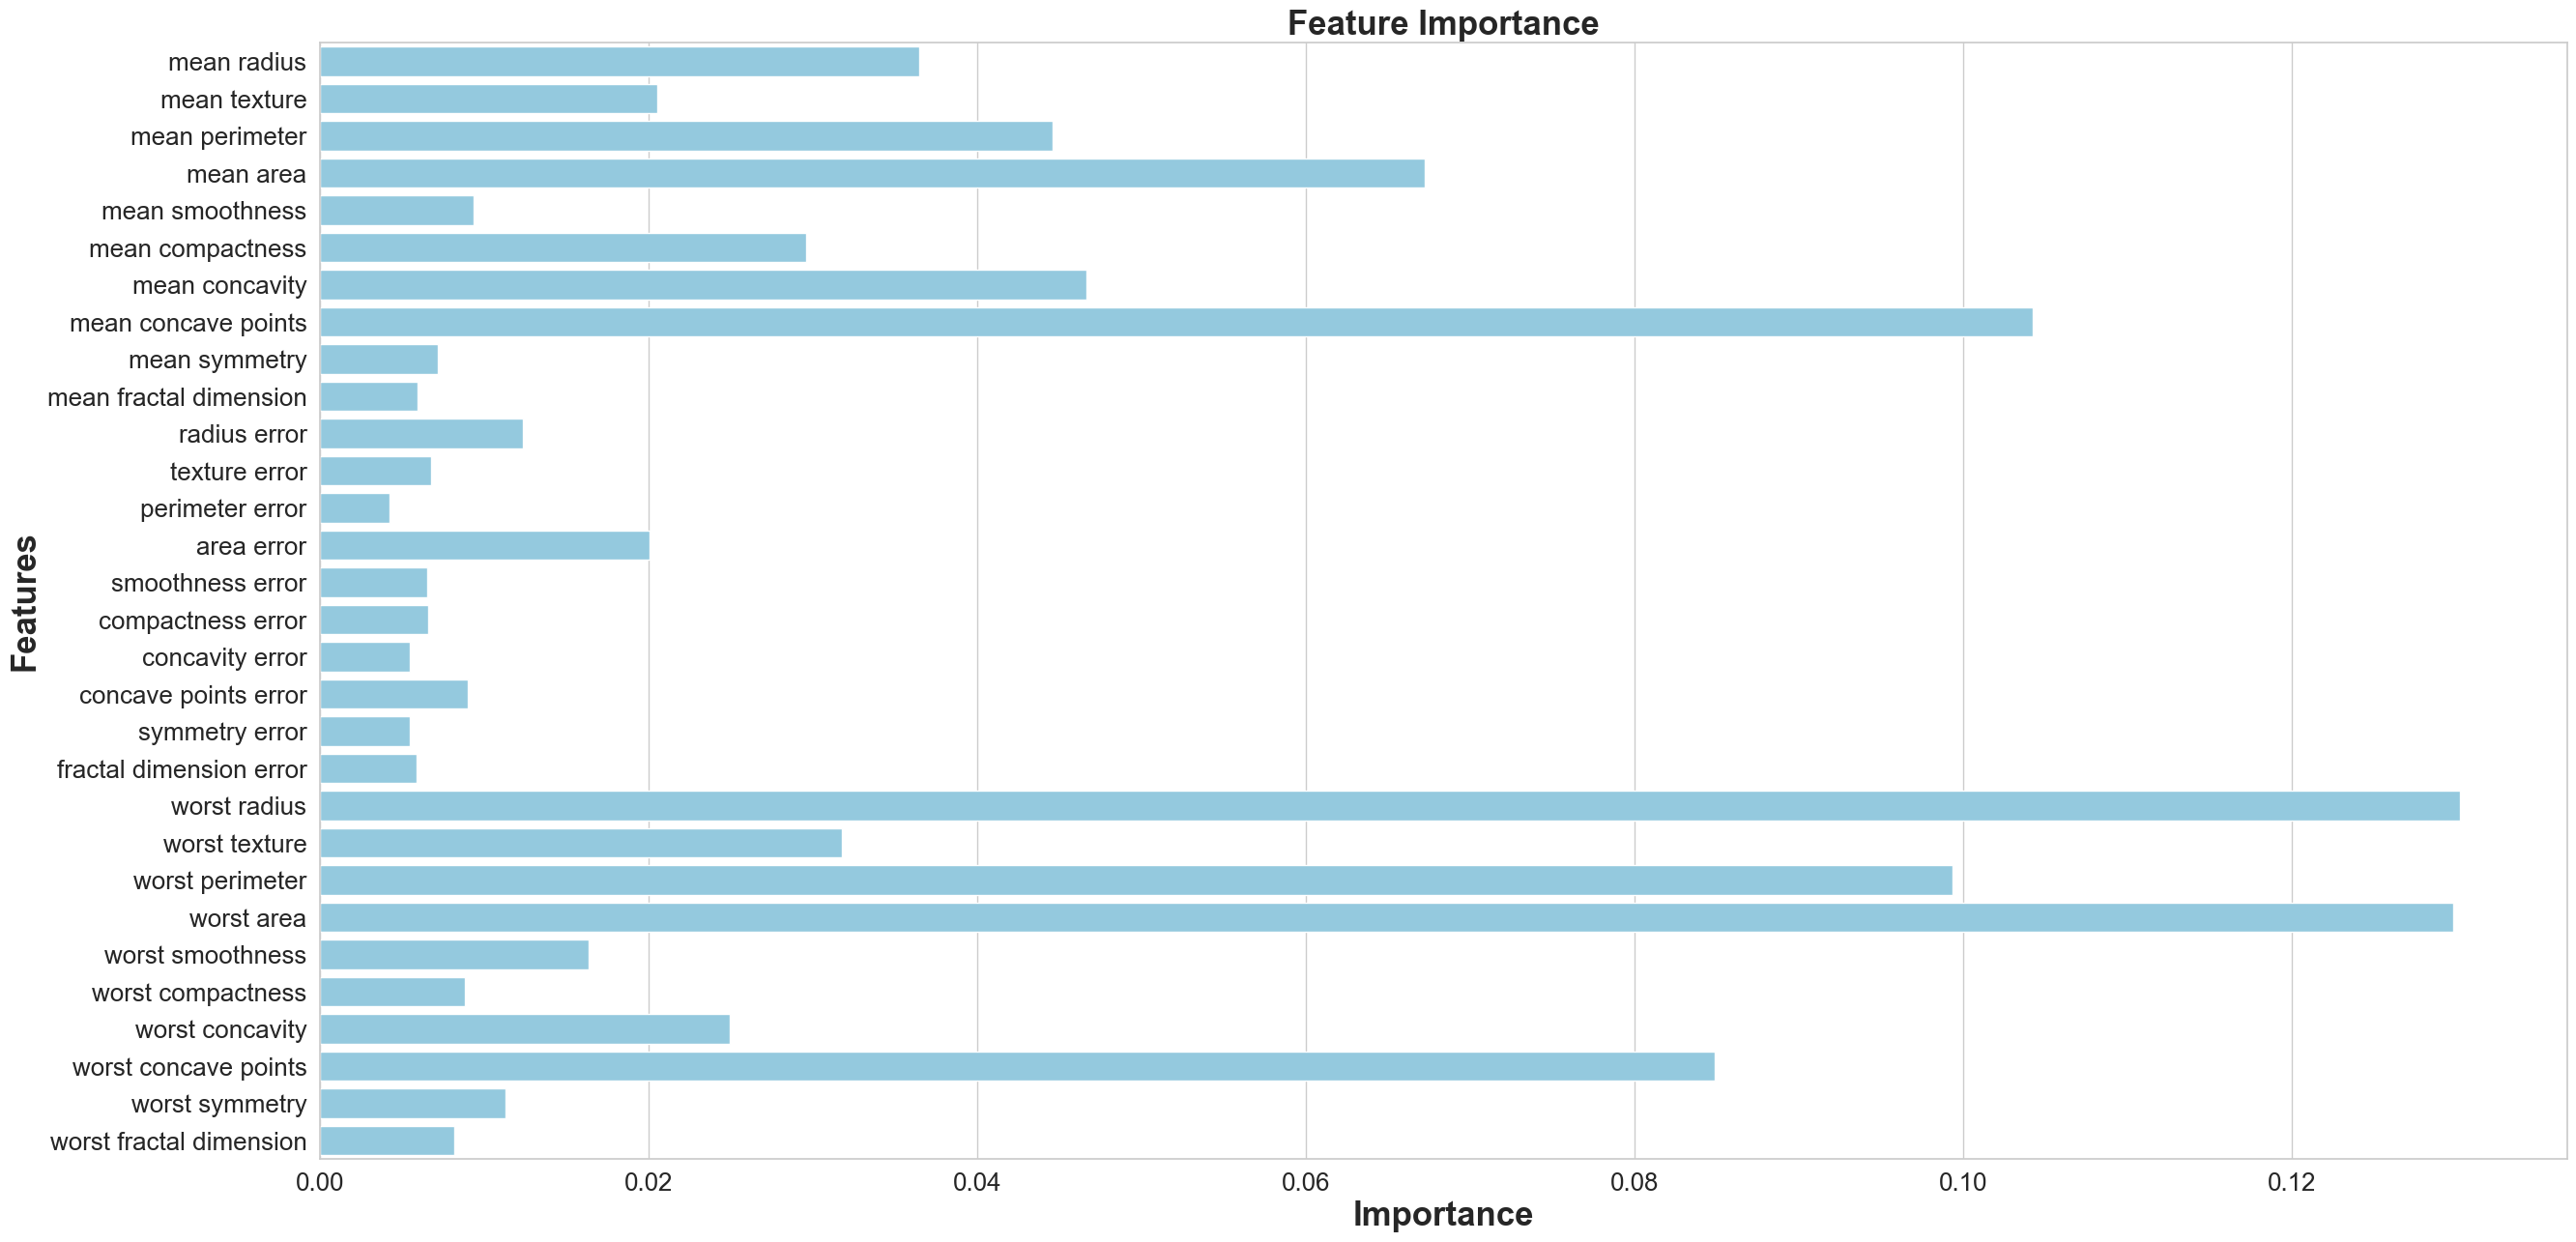

None

,Features,Gini-importace
0,mean radius,0.036507
1,mean texture,0.020571
2,mean perimeter,0.044616
3,mean area,0.067207
4,mean smoothness,0.009378
5,mean compactness,0.029585
6,mean concavity,0.046644
7,mean concave points,0.104198
8,mean symmetry,0.007176
9,mean fractal dimension,0.005987


In [27]:
feats={}
for feature, importance in zip(breast_cancer.feature_names, best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Gini-importace'})
importances = importances.reset_index()
importances = importances.rename(columns={'index':'Features'})
sns.set(font_scale = 5)
sns.set(style='whitegrid', color_codes = True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x = importances['Gini-importace'],y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title("Feature Importance", fontsize=25, weight='bold')
display(plt.show())
display(importances)

In [28]:
### 4.4 타 알고리즘과의 비교

In [29]:
# KNN
classifier = KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred) ## 정확도
recall = recall_score(y_true=y_test, y_pred=y_pred) ## 민감도
precision = precision_score(y_true=y_test, y_pred=y_pred) ## 정밀도

print("KNN")
print(f"정확도 : {acc:0.4f}  |",f"  민감도 : {recall:0.4f}  |",f"  정밀도 : {precision:0.4f}  ")

KNN
정확도 : 0.9825  |   민감도 : 1.0000  |   정밀도 : 0.9727  


In [30]:
# Decision Tree
classifier = DecisionTreeClassifier(random_state=2021)
param_grid={
    'max_depth' : [10,15,20],
    'max_leaf_nodes' : [50,100,200],
    'criterion' : ['gini','entropy']
}

CV_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid,
                             cv=10, verbose=1, n_jobs=-1) # cv
CV_classifier.fit(X_train,y_train)

best_classifier = CV_classifier.best_estimator_
best_classifier.fit(X_train,y_train)

y_pred = best_classifier.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred) ## 정확도
recall = recall_score(y_true=y_test, y_pred=y_pred) ## 민감도
precision = precision_score(y_true=y_test, y_pred=y_pred) ## 정밀도

print("Decision Tree")
print(f"정확도 : {acc:0.4f}  |",f"  민감도 : {recall:0.4f}  |",f"  정밀도 : {precision:0.4f}  ")

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Decision Tree
정확도 : 0.9649  |   민감도 : 0.9813  |   정밀도 : 0.9633  


In [31]:
from sklearn.metrics import mean_absolute_error, r2_score


# from sklearn.datasets import load_boston as boston
boston = load_boston()

# 데이터 프레임 형태로 변환
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.DataFrame(boston.target, columns=['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

#Random Forest Regressor
rfr = RandomForestRegressor(random_state=2021)
param_grid={
    'max_depth' : [10,50,100,200],
    'max_leaf_nodes' : [50,100,200],
    'criterion' : ['mae','mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid,cv=10,
                      verbose=1, n_jobs=-1, scoring='r2')
CV_rfr.fit(X_train,y_train)

best_rfr = CV_rfr.best_estimator_
best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)

r2score = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print('Random Forest Regressor')
print(f"R2 score : {r2score:0.4f}  ",f"  MSE : {mse:0.4f}  ",f"  MAE : {mae:0.4f}  ",sep='    |      ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Random Forest Regressor
R2 score : 0.8118      |        MSE : 12.2319      |        MAE : 2.2402  


In [32]:
# Decision Tree
dtr = DecisionTreeClassifier(random_state=2021)
param_grid={
    'max_depth' : [10,50,100,200],
    'max_leaf_nodes' : [50,100,200],
    'criterion' : ['mae','mse']
}

CV_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid,
                             cv=10, verbose=1, n_jobs=-1, scoring='r2')
CV_dtr.fit(X_train, y_train)

best_dtr = CV_dtr.best_estimator_
best_dtr.fit(X_train,y_train)

y_pred = best_dtr.predict(X_test)

r2score = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print('Decision Tree Regressor')
print(f"R2 score : {r2score:0.4f}  ",f"  MSE : {mse:0.4f}  ",f"  MAE : {mae:0.4f}  ",sep='    |      ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits


ValueError: Unknown label type: 'continuous'